In [1]:
%matplotlib inline
import librosa.display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import os
import librosa
import IPython.display as ipd
import librosa.display
from scipy.io import wavfile
import sklearn as sk
from sklearn import preprocessing

# Загружаем аудио

In [160]:
filename='../../Test003/data/Metki/002.wav'
y , sr = librosa.load(filename)
print(type(y), type(sr))
#print(y,sr)

<class 'numpy.ndarray'> <class 'int'>


In [3]:
import soundfile as sf
f = sf.SoundFile('../../Test003/data/Metki/002.wav')
samples=format(len(f))
print('samples = {}'.format(len(f)))
print('sample rate = {}'.format(f.samplerate))
seconds = format(len(f) / f.samplerate)
print('seconds = {}'.format(len(f) / f.samplerate))

samples = 925987
sample rate = 44100
seconds = 20.997437641723355


# Делим дорожку на кадры

In [4]:
frame_length=15433
hop_length=500
frames = librosa.util.frame(y, frame_length=frame_length, hop_length=hop_length)
#print(frames)
#print(frames.shape,y.shape)

# Загружаем метки

In [5]:
metki=np.genfromtxt('../../Test003/data/Metki/meki/002.txt',dtype='str')
metki = np.asarray(metki)
#print(metki)

In [6]:
times_frame=frame_length/sr                      #Сколько в секунде кадров
times_hop=(hop_length/sr)                        #Сколько в секунде прыжков

Делим аудио по времени на кадры.

In [7]:
times = []
for i in range(len(frames[0])):
    times.append([times_hop*i,times_frame+times_hop*i])        
#print(times)

Загружаем в таблицу

In [8]:
%%time
df = pd.DataFrame(columns = ['mfccs','frames','event_label'])
m = times
for mark in m:
    df = df.append({'frames':(mark[0],mark[1])},ignore_index=True)
print(df)

    mfccs                                      frames event_label
0     NaN                   (0.0, 0.6999092970521542)         NaN
1     NaN  (0.022675736961451247, 0.7225850340136054)         NaN
2     NaN  (0.045351473922902494, 0.7452607709750567)         NaN
3     NaN   (0.06802721088435373, 0.7679365079365079)         NaN
4     NaN   (0.09070294784580499, 0.7906122448979592)         NaN
..    ...                                         ...         ...
891   NaN     (20.20408163265306, 20.903990929705216)         NaN
892   NaN     (20.22675736961451, 20.926666666666666)         NaN
893   NaN     (20.249433106575964, 20.94934240362812)         NaN
894   NaN     (20.272108843537413, 20.97201814058957)         NaN
895   NaN    (20.294784580498867, 20.994693877551022)         NaN

[896 rows x 3 columns]
Wall time: 6.22 s


# Смотрим попала ли метка в кадр

In [9]:
block = np.zeros((len(frames[0])), dtype=int)
for i,mark in enumerate(times):   
    for j in range(len(metki)):    
        if (mark[0]) <= float(metki[j,0]) <= (mark[1]) and (mark[0]) <= float(metki[j,1]) <= (mark[1]):
            block[i]=1
#print(block)

In [16]:
df['event_label'] = block
df.head()

,mfccs,frames,event_label
0,NaN,"(0.0, 0.6999092970521542)",0
1,NaN,"(0.022675736961451247, 0.7225850340136054)",0
2,NaN,"(0.045351473922902494, 0.7452607709750567)",0
3,NaN,"(0.06802721088435373, 0.7679365079365079)",0
4,NaN,"(0.09070294784580499, 0.7906122448979592)",0


# Кепстральные коэффициенты Mel-частоты (MFCC)

# Нормируем данные

In [17]:
#данные не нормированные и нормированные 10 глотков.
mfccs_1=librosa.feature.mfcc(y=y, sr=sr, hop_length=512, htk=True, n_mfcc=15,dct_type = 2,norm = 'ortho')
mfccs_new = sk.preprocessing.scale(mfccs_1, axis=1, with_mean= True, with_std= True, copy=True)
#print(mfccs_new.mean(), mfccs_new.min(),mfccs_new.max(),mfccs_new.std())

C:\Users\Alexandra\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\Alexandra\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


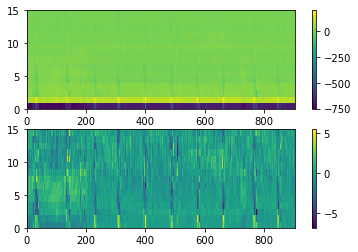

In [18]:
plt.subplot(2,1,1)
plt.pcolormesh(mfccs_1[:,:])
plt.colorbar()
plt.subplot(2,1,2)
plt.pcolormesh(mfccs_new[:,:])
plt.colorbar()
plt.show()

In [21]:
#нормируем все кадры
frames_norm = sk.preprocessing.scale(frames, axis=1, with_mean= True, with_std= True, copy=True)
print(frames_norm.mean(),frames_norm.min(),frames_norm.max(),frames_norm.std())

1.974113e-09 -19.85645 22.303673 1.0


C:\Users\Alexandra\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


In [22]:
#1 кадр не нормированный и нормированный.
mfccs2=librosa.feature.mfcc(y=frames[:,0], sr=sr, hop_length=512, htk=True, n_mfcc=15,dct_type = 2,norm = 'ortho')
mfccs1=librosa.feature.mfcc(y=frames_norm[:,0], sr=sr, hop_length=512, htk=True, n_mfcc=15,dct_type = 2,norm = 'ortho')

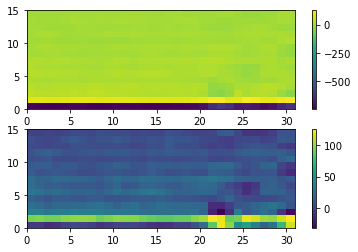

In [23]:
plt.subplot(2,1,1)
plt.pcolormesh(mfccs2[:,:])
plt.colorbar()
plt.subplot(2,1,2)
plt.pcolormesh(mfccs1[:,:])
plt.colorbar()
plt.show()

In [24]:
#нормируем все кадры
frames_norm = sk.preprocessing.scale(frames, axis=1, with_mean= True, with_std= True, copy=True)
#print(frames_norm.mean(),frames_norm.min(),frames_norm.max(),frames_norm.std())

C:\Users\Alexandra\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


Делим коэффициенты на кадры

In [127]:
mfccs = []
for i in range(len(frames[0])):   
    mfccs.append(librosa.feature.mfcc(y=frames_norm[:,i], sr=sr, hop_length=512, htk=True, n_mfcc=15,dct_type = 2,norm = None))

Переводим в одномерный массив

In [26]:
MFCCS = []
for i in range(len(frames[0])): 
    MFCCS.append(mfccs[i].flatten())
#    print(MFCCS[0])

In [27]:
MFCCS=np.array(MFCCS, dtype=float)
#MFCCS.shape

In [28]:
df['mfccs'] = list(MFCCS)
#df.head()

# Кратковременное преобразование Фурье (STFT).

In [101]:
#ненормированные
p=librosa.stft( y=frames[:,0], n_fft = 512, hop_length = 500, win_length = None, window = 'hann', center = True, dtype = None, pad_mode = 'reflect')

In [102]:
stft = []
for i in range(len(frames[0])):   
    stft.append(librosa.stft(y=frames_norm[:,i], n_fft = 512, hop_length = 500, win_length = None, window = 'hann', center = True, dtype = None, pad_mode = 'reflect'))

C:\Users\Alexandra\anaconda3\lib\site-packages\librosa\core\spectrum.py:1641: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  warnings.warn(


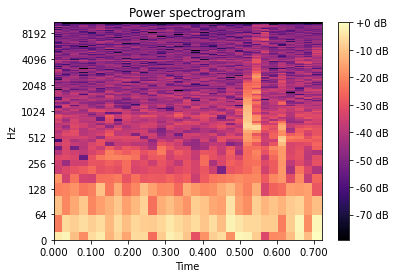

In [103]:
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(p,
                                                       ref=np.max),
                               y_axis='log', x_axis='time', ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

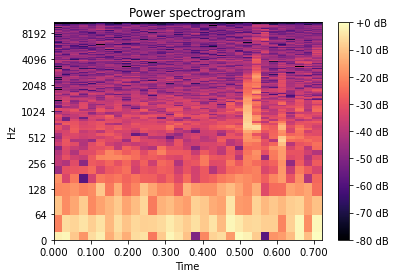

In [104]:
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(stft[0],
                                                       ref=np.max),
                               y_axis='log', x_axis='time', ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

In [105]:
STFT = []
for i in range(len(frames[0])): 
    STFT.append(stft[i].flatten())

In [106]:
STFT=np.array(STFT, dtype=float)
#print(STFT[0])
STFT.shape

<ipython-input-106-64b950d56e44>:1: ComplexWarning: Casting complex values to real discards the imaginary part
  STFT=np.array(STFT, dtype=float)


(896, 7967)

In [107]:
#x_df = STFT
#y_df = block

# Вейвлет-преобразование 

In [315]:
import pywt

In [316]:
#Возвращает список доступных встроенных семейств вейвлетов.
#Хаар ( haar )
#Добеши ( db )
#Symlets ( sym )
#Койфлеты ( coif )
#Биортогональный ( bior )
#Обратный биортогональный ( rbio )
#«Дискретное» FIR-приближение вейвлета Мейера ( dmey )
pywt.families()

['haar',
 'db',
 'sym',
 'coif',
 'bior',
 'rbio',
 'dmey',
 'gaus',
 'mexh',
 'morl',
 'cgau',
 'shan',
 'fbsp',
 'cmor']

In [317]:
print(pywt.wavelist( 'dmey'))

['dmey']


In [318]:
wavelet = pywt.Wavelet('dmey')
print(wavelet)

Wavelet dmey
  Family name:    Discrete Meyer (FIR Approximation)
  Short name:     dmey
  Filters length: 62
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       symmetric
  DWT:            True
  CWT:            False


In [338]:
#Не нормированные данные
cA1, cD1  = pywt.dwt(frames[0], wavelet , mode='symmetric', axis=-1)
#plt.plot(cA1)
#plt.plot(cD1)
plt.show()

In [343]:
#(cA, cD) : Аппроксимационные и детальные коэффициенты.
#Нормированные
cA, cD  = pywt.dwt(frames_norm[:,0], wavelet , mode='symmetric', axis=-1)
#plt.plot(cA)
#plt.plot(cD)
plt.show()

In [344]:
#wavelet.filter_bank
#(w.dec_lo, w.dec_hi, w.rec_lo, w.rec_hi) 

In [352]:
waveletcA = []
waveletcD = []
for i in range(len(frames[0])):  
    cA, cD  = pywt.dwt(frames_norm[:,i], wavelet , mode='symmetric', axis=-1)
    waveletcA.append(cA)
    waveletcD.append(cD)

In [359]:
waveletCA = []
waveletCD = []
for i in range(len(frames[0])): 
    waveletCA.append(waveletcA[i].flatten())
    waveletCD.append(waveletcD[i].flatten())

In [360]:
waveletCA=np.array(waveletCA, dtype=float)
#print(waveletCA[0])
waveletCD=np.array(waveletCD, dtype=float)
#print(waveletCD[0])
waveletCA.shape,waveletCD.shape

((896, 7747), (896, 7747))

# Делим на обучающую и тестовую выборки и обучаем

In [29]:
x_df = MFCCS

In [30]:
y_df = block

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [32]:
x_train, x_valid, y_train, y_valid = train_test_split(x_df,y_df, test_size=0.3, random_state=17)

# Дерево решений

Обучаем модель

In [33]:
tree = DecisionTreeClassifier(max_depth=5, random_state=17)
tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=17)

Оценка модели

In [34]:
tree_pred = tree.predict(x_valid)
accuracy_score(y_valid, tree_pred) 

0.9219330855018587

Настроим параметры модели

In [35]:
tree_params = {'max_depth': range(1,11),'max_features': range(1,19)}

In [36]:
tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1, verbose=True)

In [37]:
tree_grid.fit(x_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 840 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:    5.8s finished


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=5, random_state=17),
             n_jobs=-1,
             param_grid={'max_depth': range(1, 11),
                         'max_features': range(1, 19)},
             verbose=True)

In [38]:
tree_grid.best_score_,tree_grid.best_params_

(0.952152380952381, {'max_depth': 5, 'max_features': 16})

In [39]:
accuracy_score(y_valid, tree_grid.predict(x_valid))

0.9182156133828996

# Метод ближайших соседей

Обучаем модель

In [40]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

Оценка модели

In [41]:
knn_pred = knn.predict(x_valid)
accuracy_score(y_valid, knn_pred) 

0.9516728624535316

Настроим параметры модели

In [42]:
knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=-1))])

In [43]:
knn_params = {'knn__n_neighbors': range(1, 10)}

In [44]:
knn_grid = GridSearchCV(knn_pipe, knn_params, cv=5, n_jobs=-1, verbose=True)

In [45]:
knn_grid.fit(x_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    1.6s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn',
                                        KNeighborsClassifier(n_jobs=-1))]),
             n_jobs=-1, param_grid={'knn__n_neighbors': range(1, 10)},
             verbose=True)

In [46]:
knn_grid.best_params_, knn_grid.best_score_

({'knn__n_neighbors': 1}, 0.9776761904761905)

In [47]:
accuracy_score(y_valid, knn_grid.predict(x_valid))

0.9702602230483272

# Случайный лес

In [48]:
forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=17)
print(np.mean(cross_val_score(forest, x_train, y_train, cv=5))) 

0.9872380952380952


In [49]:
forest_params = {'max_depth': range(1,11), 'max_features': range(1,19)}

In [50]:
forest_grid = GridSearchCV(forest, forest_params, cv=5, n_jobs=-1, verbose=True)

In [51]:
forest_grid.fit(x_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   43.8s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  1.8min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=17),
             n_jobs=-1,
             param_grid={'max_depth': range(1, 11),
                         'max_features': range(1, 19)},
             verbose=True)

In [52]:
forest_grid.best_params_, forest_grid.best_score_ 

({'max_depth': 6, 'max_features': 18}, 0.9888380952380953)

In [53]:
accuracy_score(y_valid, forest_grid.predict(x_valid))

0.9702602230483272

# Визуализация дерева решений

In [56]:
dot_data = tree.export_graphviz(tree_grid.best_estimator_, out_file='tree.dot',filled=True)

In [57]:
!dir *png

 Том в устройстве C имеет метку Acer
 Серийный номер тома: 3C4E-9E6E

 Содержимое папки C:\Users\Alexandra\Test003\SF

27.10.2021  23:43           157 843 tree.png
27.10.2021  18:28            70 822 tree1.png
               2 файлов        228 665 байт
               0 папок  24 644 214 784 байт свободно


In [58]:
!dot -Tpng tree.dot -o tree.png

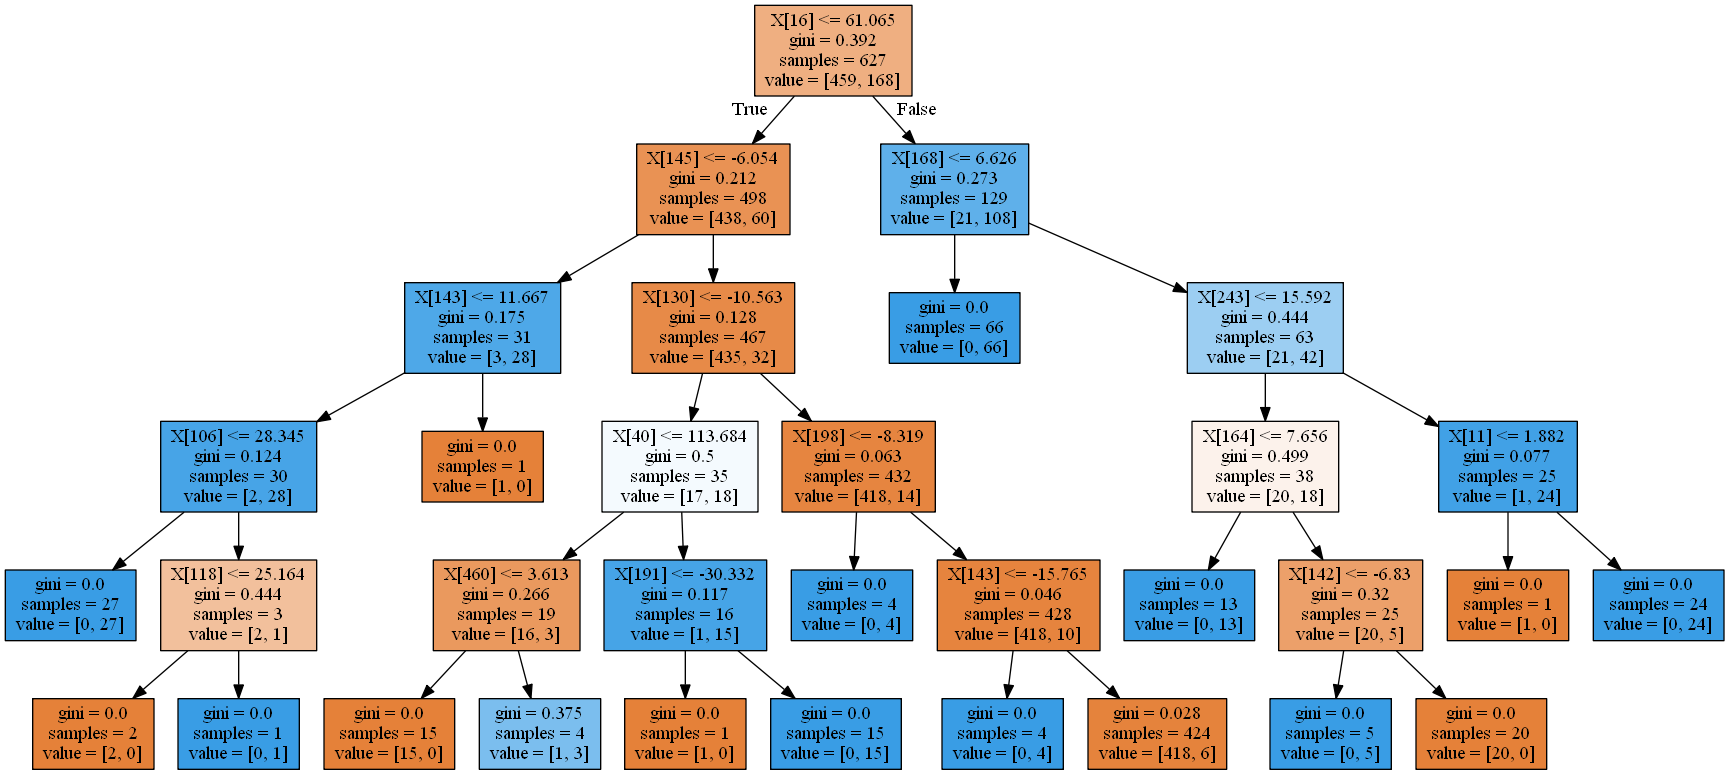

In [59]:
Image(filename='tree.png') 

# Построение кривых валидации для kNN

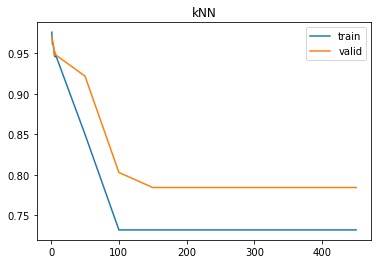

In [100]:
train_scores, valid_scores = [], []
n_neighb = [1, 2, 3, 5, 6, 7] + list(range(50, 500, 50))

for k in n_neighb:
    knn = KNeighborsClassifier(n_neighbors=k)
    train_scores.append(np.mean(cross_val_score(knn, x_train, y_train, cv=5)))
    knn.fit(x_train, y_train)
    valid_scores.append(accuracy_score(y_valid, knn.predict(x_valid)))  

plt.plot(n_neighb, train_scores, label='train')
plt.plot(n_neighb, valid_scores, label='valid')
plt.title('kNN')
plt.legend();

In [169]:
mel_basis = librosa.filters.mel(sr=22050, n_fft=512, n_mels=10,fmin=0, fmax=sr / 2)

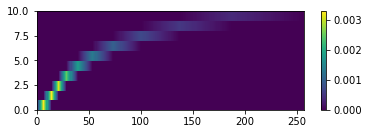

In [170]:
plt.subplot(2,1,1)
plt.pcolormesh(mel_basis)
plt.colorbar()

In [174]:
sr = 22050
mel_basis = librosa.filters.mel(sr=sr, n_fft=512, n_mels=10,fmin=0, fmax=sr / 2, htk=False, norm=None)

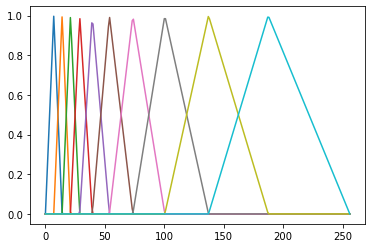

In [175]:
plt.plot(mel_basis.T)
plt.show()